In [2]:
import preprocessor, league_table, soccer_model

In [3]:
import math
import numpy as np
import pandas as pd
from itertools import cycle
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

from scipy import interp
import scipy.stats as scs
import statsmodels.api as sm
from scipy.spatial.distance import cdist

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format='retina'

Enter path to file that you wish to preprocess and plot: (should be a .csv file) ../data/FootballEurope/FootballEurope.csv


/Users/CEO/DSI/dsi-CapstoneProj/src/league_table.py:67: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  plot_table = plot_league_table(csv_file)


                EPLresultH  EPLresultA  EPLresult
Man City               220         167        387
Chelsea                213         172        385
Arsenal                208         165        373
Tottenham              197         165        362
Man Utd                197         161        358
Liverpool              190         153        343
Everton                178         112        290
Southampton            152         114        266
Stoke                  152          89        241
West Ham               147          93        240
Swansea                138          94        232
West Brom              129          88        217
Sunderland              99          79        178
Crystal Palace          89          87        176
Leicester              102          64        166
Newcastle              109          57        166
Aston Villa             73          61        134
Norwich                 78          33        111
Hull                    73          33        106


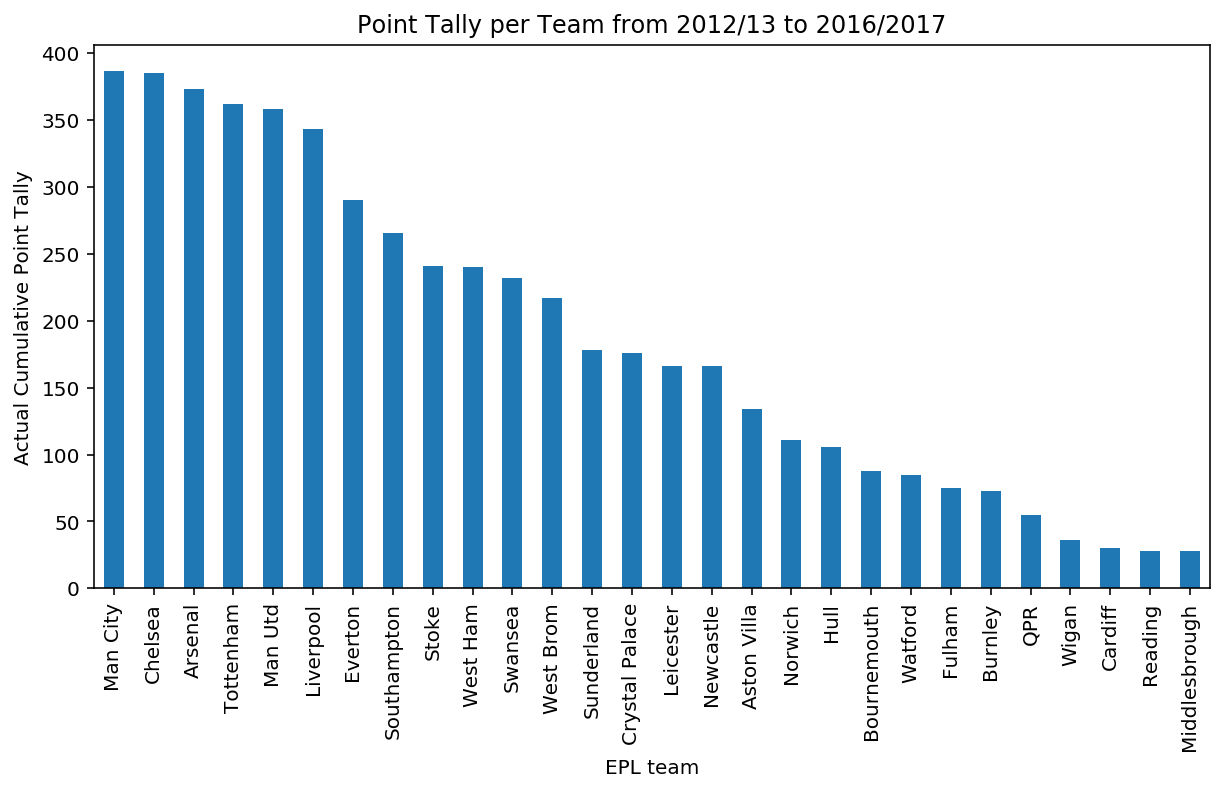

<Figure size 432x288 with 0 Axes>

In [9]:
%run league_table.py #../data/FootballEurope/FootballEurope.csv

In [ ]:
raw_df = pd.read_csv

In [4]:
clean_df = preprocessor.create_model_df('../data/FootballEurope/FootballEurope.csv')

/Users/CEO/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
clean_df.head()

,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayInterceptionsFT,homeDribbledPastFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,resultsLabel
0,14.0,73.69,6.38,47.22,12,22,2.0,4.0,14,10.0,7.0,4.0,38.89,22,9.0,2,17,47.65,34,10.0,5.0,75.00,13,6,5.0,5.0,0,21,66.73,4.0,1,11,10.0,34,2.0,7,20,21,18,6.73,12.0,75.00,52.35,11.0,1
1,11.0,75.78,6.39,27.27,12,15,5.0,4.0,7,3.0,8.0,4.0,31.82,15,6.0,2,9,53.71,11,3.0,4.0,86.96,7,13,2.0,4.0,2,10,80.95,6.0,2,10,2.0,22,3.0,12,11,14,26,6.37,13.0,88.89,46.29,11.0,0
2,16.0,74.86,6.73,66.67,12,19,6.0,5.0,16,6.0,3.0,6.0,45.00,19,11.0,2,16,39.82,15,6.0,5.0,73.53,9,9,2.0,5.0,2,19,69.70,5.0,3,8,6.0,25,4.0,26,9,5,20,6.04,11.0,75.00,60.18,15.0,0
3,6.0,78.43,6.41,27.78,11,36,2.0,3.0,10,5.0,3.0,3.0,63.33,36,8.0,2,10,45.98,24,5.0,8.0,63.54,2,9,4.0,8.0,2,14,64.96,3.0,3,10,5.0,24,1.0,26,18,23,23,6.43,14.0,79.55,54.02,11.0,1
4,9.0,61.07,6.51,40.00,10,48,4.0,2.0,13,6.0,14.0,4.0,66.18,48,5.0,2,0,53.20,19,6.0,16.0,61.61,11,13,3.0,16.0,3,16,77.44,4.0,4,14,4.0,25,1.0,20,16,7,37,6.45,24.0,71.93,46.80,8.0,1


In [8]:
clean_df.describe()

,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,homeFoulsCommitedFT,homeAerialsTotalFT,awayShotsOnTargetFT,awayShotsBlockedFT,homePassesKeyFT,awayDribblesWonFT,homeCornersTotalFT,homeShotsBlockedFT,homeDribbleSuccessFT,awayAerialsTotalFT,awayPassesKeyFT,homeFormation,refereeName,homePossessionFT,awayInterceptionsFT,homeDribbledPastFT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,awayFormation,homeShotsTotalFT,homePassSuccessFT,awayCornersTotalFT,homeTeam,awayFoulsCommitedFT,homeShotsOnTargetFT,homeTacklesTotalFT,homeOffsidesCaughtFT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,resultsLabel
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,11.652632,66.202174,6.422389,54.045126,10.816842,35.014737,3.918421,3.174737,11.051053,8.604737,6.025789,3.953684,54.122232,35.019474,8.766316,1.718947,11.621053,41.371274,15.014737,8.605263,9.296842,69.426326,12.090000,11.525263,2.033158,9.296316,1.734737,14.722105,68.811384,4.768947,12.090000,11.442632,4.865789,27.199474,2.197895,16.442105,15.564737,14.979474,28.421579,6.489500,16.913684,70.695500,38.828721,11.690000,0.154211
std,4.430538,8.267677,0.204565,16.704883,3.371368,12.297985,2.195351,2.159026,4.744113,4.356189,3.120009,2.519845,16.119153,12.297272,3.999884,0.923600,6.930147,21.722795,5.734956,4.356056,4.323819,10.716720,7.649359,4.344183,1.595958,4.325012,0.969875,5.705576,8.534909,2.639032,7.649359,3.518457,2.621535,7.981396,1.605282,10.269220,6.489390,5.905710,7.998332,0.203004,6.559721,11.362333,20.538569,4.810709,0.853644
min,1.000000,40.610000,5.670000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.200000,2.000000,0.000000,0.000000,31.410000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,42.400000,0.000000,1.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2.000000,7.000000,5.830000,0.000000,27.780000,0.230000,1.000000,-1.000000
25%,9.000000,60.435000,6.290000,43.330000,8.000000,26.000000,2.000000,2.000000,8.000000,6.000000,4.000000,2.000000,43.750000,26.000000,6.000000,1.000000,7.000000,38.937500,11.000000,6.000000,6.000000,62.500000,6.000000,8.000000,1.000000,6.000000,1.000000,11.000000,62.705000,3.000000,6.000000,9.000000,3.000000,22.000000,1.000000,8.000000,11.000000,11.000000,23.000000,6.360000,12.000000,63.160000,35.602500,8.000000,-1.000000
50%,11.000000,66.410000,6.410000,53.850000,11.000000,34.000000,4.000000,3.000000,10.000000,8.000000,6.000000,4.000000,54.550000,34.000000,8.000000,2.000000,12.000000,48.600000,14.000000,8.000000,9.000000,69.230000,11.000000,11.000000,2.000000,9.000000,2.000000,14.000000,69.010000,4.000000,11.000000,11.000000,5.000000,27.000000,2.000000,17.000000,15.000000,14.000000,28.000000,6.480000,16.000000,71.430000,45.975000,11.000000,0.000000
75%,14.000000,72.052500,6.540000,64.710000,13.000000,42.000000,5.000000,4.000000,14.000000,11.000000,8.000000,5.000000,65.000000,42.000000,11.000000,2.000000,17.000000,55.807500,18.000000,11.000000,12.000000,76.670000,19.000000,14.000000,3.000000,12.000000,2.000000,18.000000,75.350000,6.000000,19.000000,14.000000,6.000000,32.000000,3.000000,24.000000,19.000000,19.000000,34.000000,6.610000,21.000000,78.260000,52.660000,14.250000,1.000000
max,35.000000,89.690000,7.120000,100.000000,24.000000,107.000000,15.000000,13.0

In [12]:
clean_df[['awayFormation','homeFormation']].tail(8)

,awayFormation,homeFormation
1892,4,2
1893,2,2
1894,1,2
1895,2,2
1896,3,1
1897,2,1
1898,2,0
1899,3,0


In [16]:
clean_df[sorted(clean_df.filter(regex='away', axis=1).columns)].head()

,awayAerialsTotalFT,awayCornersTotalFT,awayDispossessedFT,awayDribbleSuccessFT,awayDribbledPastFT,awayDribblesAttemptedFT,awayDribblesWonFT,awayFormation,awayFoulsCommitedFT,awayInterceptionsFT,awayOffsidesCaughtFT,awayPassSuccessFT,awayPassesKeyFT,awayPossessionFT,awayRatingsFT,awayShotsBlockedFT,awayShotsOnTargetFT,awayShotsTotalFT,awayTackleSuccessFT,awayTacklesTotalFT,awayTeam
0,22,4.0,14.0,47.22,5.0,20,10.0,0,11,34,5.0,73.69,9.0,52.35,6.38,4.0,2.0,11.0,75.00,18,13
1,15,6.0,11.0,27.27,4.0,11,3.0,2,10,11,2.0,75.78,6.0,46.29,6.39,4.0,5.0,11.0,86.96,26,7
2,19,5.0,16.0,66.67,5.0,9,6.0,2,8,15,2.0,74.86,11.0,60.18,6.73,5.0,6.0,15.0,73.53,20,9
3,36,3.0,6.0,27.78,8.0,18,5.0,2,10,24,4.0,78.43,8.0,54.02,6.41,3.0,2.0,11.0,63.54,23,2
4,48,4.0,9.0,40.00,16.0,16,6.0,3,14,19,3.0,61.07,5.0,46.80,6.51,2.0,4.0,8.0,61.61,37,11


# Clustering

In [25]:
clean_df.columns

Index(['awayDispossessedFT', 'awayPassSuccessFT', 'awayRatingsFT',
       'awayDribbleSuccessFT', 'homeFoulsCommitedFT', 'homeAerialsTotalFT',
       'awayShotsOnTargetFT', 'awayShotsBlockedFT', 'homePassesKeyFT',
       'awayDribblesWonFT', 'homeCornersTotalFT', 'homeShotsBlockedFT',
       'homeDribbleSuccessFT', 'awayAerialsTotalFT', 'awayPassesKeyFT',
       'homeFormation', 'refereeName', 'homePossessionFT',
       'awayInterceptionsFT', 'homeDribbledPastFT', 'homeDribblesWonFT',
       'awayTackleSuccessFT', 'awayTeam', 'homeDispossessedFT',
       'awayOffsidesCaughtFT', 'awayDribbledPastFT', 'awayFormation',
       'homeShotsTotalFT', 'homePassSuccessFT', 'awayCornersTotalFT',
       'homeTeam', 'awayFoulsCommitedFT', 'homeShotsOnTargetFT',
       'homeTacklesTotalFT', 'homeOffsidesCaughtFT', 'venueName',
       'awayDribblesAttemptedFT', 'homeInterceptionsFT', 'awayTacklesTotalFT',
       'homeRatingsFT', 'homeDribblesAttemptedFT', 'homeTackleSuccessFT',
       'awayPossession